# Random Forest Project 

Dataset: LendingClub

Lending Club connects borrowers with investors. As an investor we want to invest in people who showed a profile of having a high probability of paying you back. 
I will try to create a model that will help predict this.

I will use lending Club data from 2007-2010 before they went public and try to classify and predict whether or not the borrower paid back their loan in full.

column representation:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### Importing Libraries

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the Data

In [4]:
df=pd.read_csv('loan_data.csv')

** Checking the info(), head(), and describe() methods on loans/dataframe=df.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Exploratory Data Analysis

EDA using seaborn and pandas.

*Creating a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.*

Text(0.5, 0, 'FICO')

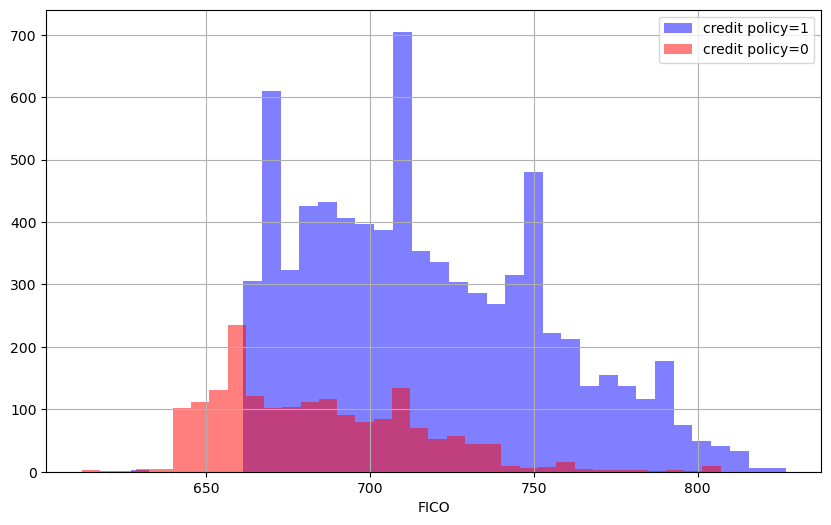

In [28]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(bins=35,color='blue',label='credit policy=1',alpha=0.5)
df[df['credit.policy']==0]['fico'].hist(bins=35,color='red',label='credit policy=0',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

** Creating a similar figure by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

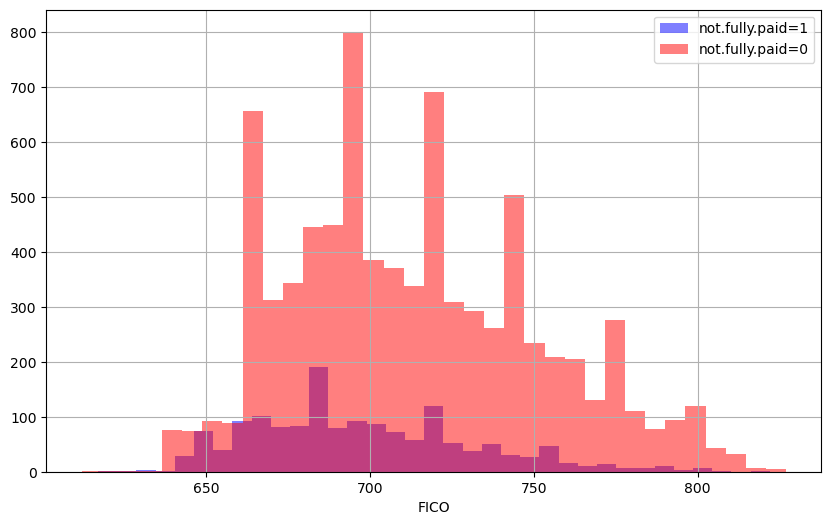

In [31]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=35,color='blue',label='not.fully.paid=1',alpha=0.5)
df[df['not.fully.paid']==0]['fico'].hist(bins=35,color='red',label='not.fully.paid=0',alpha=0.5)
plt.legend()
plt.xlabel('FICO')

** Creating a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot:xlabel='purpose', ylabel='count'>

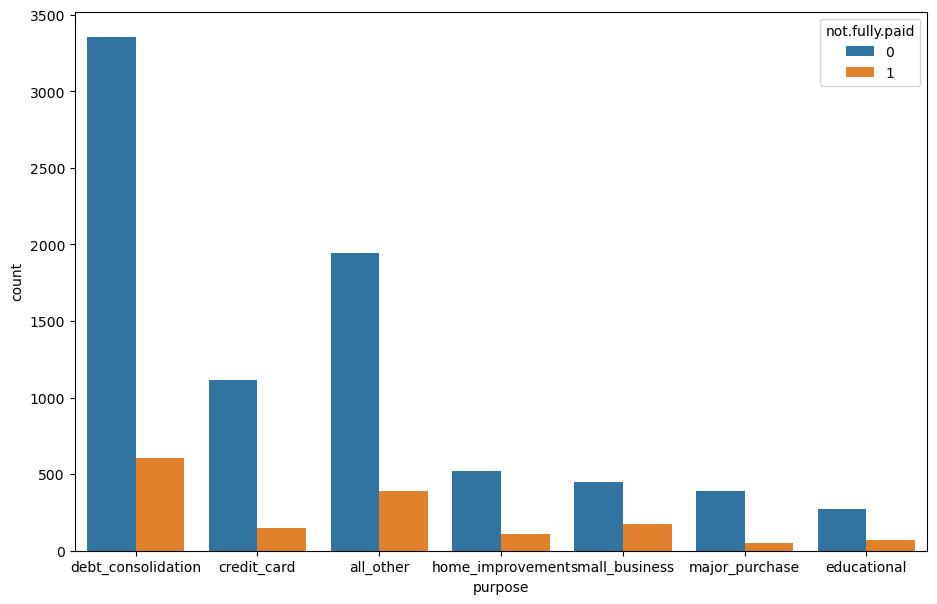

In [39]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=df,hue='not.fully.paid')

** Checking the trend between FICO score and interest rate using jointplot.**

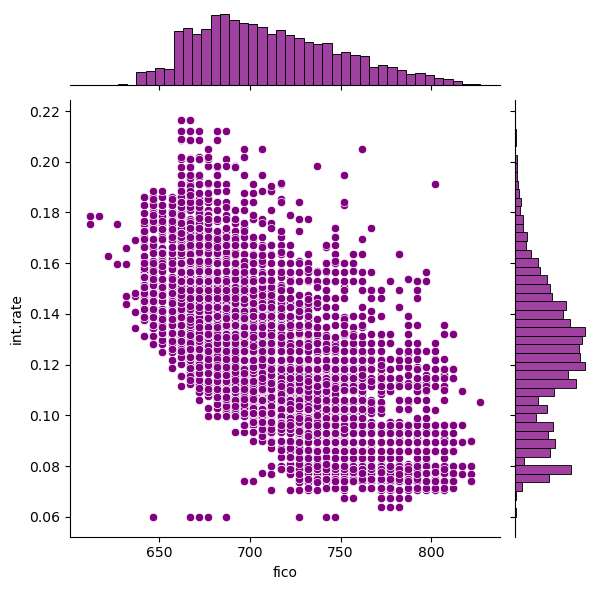

In [41]:
sns.jointplot(x='fico',data=df,y='int.rate',color='purple')

** Creating the lmplots to see if the trend differed between not.fully.paid and credit.policy.**

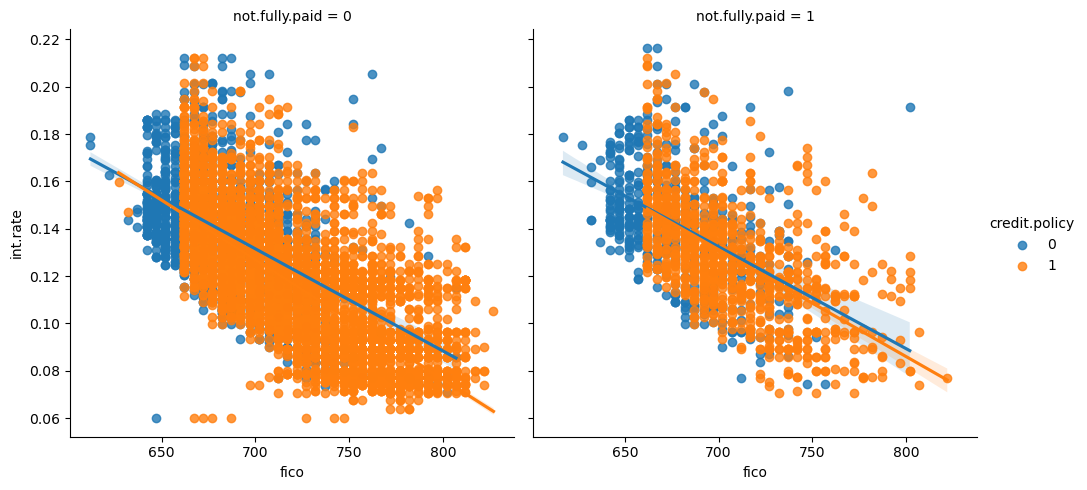

In [44]:
sns.lmplot(data=df,x='fico',y='int.rate',hue='credit.policy',col='not.fully.paid')

### Setting up the Data

setting up data for Random Forest Classification Model

**Checking loans.info() again.**

In [45]:
df.info()
# as we can see 'purpose' is a object data type and we need to convert in into the numerical form 
# such as int/float/unit8 using get.dummies().

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorical Features

The **purpose** column is categorical and need to transform ( pd.get_dummies) it into numerical type using dummy variables so that sklearn could understand it.

**Creating a list of 1 element containing the string 'purpose'and calling this list cat_feats.**

In [46]:
purposedummy=['purpose']

**Now using pd.get_dummies(loans,columns=cat_feats,drop_first=True) to create a fixed larger dataframe that has new feature columns with dummy variables. Setting this dataframe as final_data.**

In [47]:
dfpuposedummy=pd.get_dummies(data=df,columns=purposedummy,drop_first=True)

In [49]:
dfpuposedummy.info()
# now 'object' type of 'purpose' column is converted into 'unit8' type numerical data
# which ML model can understand.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

### Train Test Split

splitting the data into a training set and a testing set

**Using sklearn to split your data into a training set and a testing set.**

In [51]:
from sklearn.model_selection import train_test_split

In [54]:
X=dfpuposedummy.drop('not.fully.paid',axis=1)
y=dfpuposedummy['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training a Decision Tree Model
training a single decision tree first

** Importing DecisionTreeClassifier**

In [66]:
from sklearn.tree import DecisionTreeClassifier

**Creating an instance of DecisionTreeClassifier() called dtree and fitting it to the training data.**

In [67]:
dtree=DecisionTreeClassifier()

In [69]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

### Predictions and Evaluation of Decision Tree
**Creating predictions from the test set and creating a classification report and a confusion matrix.**

In [70]:
predictions=dtree.predict(X_test)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix

In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



In [73]:
print(confusion_matrix(y_test,predictions))

[[2005  426]
 [ 340  103]]


### Training the Random Forest model

**Creating an instance of the RandomForestClassifier class and fitting it to training data from the previous step.**

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
rfc=RandomForestClassifier(n_estimators=300)

In [81]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300)

## Predictions and Evaluation
predicting the y_test values and evaluating our model.

** Predicting the class of not.fully.paid for the X_test data.**

In [82]:
predictions=rfc.predict(X_test)

**creating a classification report from the results.**

In [83]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.58      0.02      0.05       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



**Checking the Confusion Matrix for the predictions.**

In [84]:
print(confusion_matrix(y_test,predictions))

[[2423    8]
 [ 432   11]]


#### Random forest Vs. Decision tree- What performed better here?

Random Forest 